In [132]:
import pandas as pd
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
nltk.download('punkt')
from nltk.stem.porter import PorterStemmer
nltk.download('wordnet')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction import text 

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sowmyasrinivasan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sowmyasrinivasan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sowmyasrinivasan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [91]:
slim = pd.read_csv('slim.csv')
character = pd.read_csv('fixed_characters.csv')

In [92]:
sw = stopwords.words('english')
names = character.name.str.lower().to_list()
sw.extend(names)
slimmer = slim[slim['gender'] != 2]

In [93]:
stop_words = text.ENGLISH_STOP_WORDS.union(names)

In [94]:
female = slimmer[slimmer['gender'] == 1]
male = slimmer[slimmer['gender'] == 0]

In [95]:
len(female)

82221

In [96]:
m_test = male.sample(n=len(female))

In [97]:
test = female.append(m_test)

#### testing on one

In [179]:
t = "she's they're on knowledge's door"
tknzr = TweetTokenizer()
text_tokens = tknzr.tokenize(t)
text_tokens = [split(x) for x in text_tokens]
tokens_without_sw = [word for word in text_tokens if not word in sw]

In [181]:
tokens_without_sw

['knowledge', 'door']

In [182]:
porter_stemmer = PorterStemmer()
words = [porter_stemmer.stem(word) for word in tokens_without_sw]

In [183]:
words

['knowledg', 'door']

In [145]:
lemma = nltk.WordNetLemmatizer()

In [159]:
description = [lemma.lemmatize(word) for word in tokens_without_sw]
description

["they're", "death's", 'door']

In [164]:
for x in description:
    if "'" in x:
        x = x.split("'")[0]

In [166]:
def split(x):
    if "'" in x:
        y = x.split("'")[0]
    else:
        y = x
    return y

In [167]:
z = [split(x) for x in description]

In [168]:
z

['they', 'death', 'door']

In [131]:
cvec = CountVectorizer()
wm = cvec.fit_transform([t])
tokens = cvec.get_feature_names()
tokens

['gonna', 'how', 'learn', 'lie', 'need', 'okay', 're', 'to', 'you']

#### testing on all

In [186]:
dialogue = []
for x in test.dialogue:
    tknzr = TweetTokenizer()
    text_tokens = tknzr.tokenize(x)
    text_tokens = [split(x) for x in text_tokens]
    tokens_without_sw = [word for word in text_tokens if not word in sw]
    description = " ".join(tokens_without_sw)
    dialogue.append(description)

In [187]:
dialogue

['',
 '',
 'let go',
 'okay gonna need learn lie',
 'kidding know sometimes become persona know quit',
 'like fear wearing pastels',
 'good stuff',
 'endless babble like boring',
 'listen crap',
 'guillermo says go lighter gonna look like extra 90210',
 '',
 'well',
 '',
 'tons',
 'know',
 'hi',
 'knows ever heard say dip dating smokes',
 'lesbian found picture jared leto one drawers pretty sure harboring sex tendencies',
 'really really really wanna go unless goes',
 'eber deep conditioner every two days never ever use blowdryer without diffuser attachment',
 'sweet',
 'counted help cause thug obviously failing ever going date',
 '',
 'little find wench date plan progressing',
 'forget',
 'want know say though want know useful things like good stores much champagne cost stuff like chat never life point someone',
 'c tete',
 'gosh could find',
 'unsolved mystery used really popular started high school like got sick something',
 'thing mercy particularly hideous breed loser date',
 'fau

In [189]:
test.dialogue = dialogue

In [193]:
test.to_csv('clean_dialogue.csv', index=False)

In [72]:
vec = CountVectorizer(max_features = 1000)
vecf = vec.fit(test.dialogue.to_list())

In [73]:
vector = vecf.transform(test.dialogue.to_list()).toarray()

In [74]:
x = vector

In [36]:
# print("{} most common words: {}".format(max_features,count_vectorizer.get_feature_names()))

In [77]:
y = test.iloc[:,1].values

In [78]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.1, random_state = 42)

In [79]:
nb = MultinomialNB()
nb.fit(x_train,y_train)
print("accuracy: ",nb.score(x_test,y_test))

accuracy:  0.5543326238978413


In [51]:
y_pred = nb.predict(x_test)

In [52]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [53]:
import numpy as np
unique, counts = np.unique(y_pred, return_counts=True)
unique, counts

(array([0, 1]), array([26101,   894]))

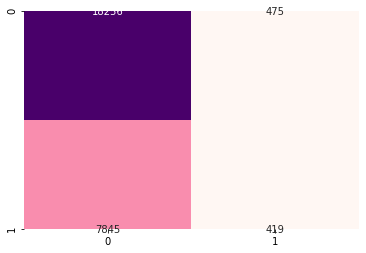

In [54]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm_rf = confusion_matrix(y_test,y_pred)

sns.heatmap(cm_rf,annot=True,cmap="RdPu",fmt=".0f",cbar=False)
plt.show()

#### test predictor

In [90]:
t = "i'm know to cry"
text_tokens = word_tokenize(t)
words = " ".join(text_tokens)
words = [words]
text_tokens

['i', "'m", 'know', 'to', 'cry']

In [87]:
test_x = vecf.transform(words).toarray()

In [82]:
len(test_x[0])

1000

In [62]:
test_y = nb.predict(test_x)

In [63]:
test_y

array([0])